In [3]:
pip install geopandas

     |████████████████████████████████| 1.0MB 17.6MB/s 
     |████████████████████████████████| 6.5MB 44.6MB/s 
     |████████████████████████████████| 14.8MB 385kB/s 


In [4]:
import pandas as pd
import geopandas as gpd
import numpy as np
import os
import urllib
from shapely.geometry import Point
import geopy.distance
from geopy import distance
from geopy import Point
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
import json
import urllib
import urllib.request

In [20]:
elevation= pd.read_csv('/content/drive/MyDrive/data/raw/SF_ele1.csv')
elevation

,station_id,lat,lng,DN
0,SF I29-1,37.783375,-122.393276,NaN
1,SF-A19,37.805339,-122.437250,NaN
2,SF-A20,37.804438,-122.433527,7.0
3,SF-A27,37.804778,-122.403261,NaN
4,SF-AA15,37.720570,-122.447685,71.0
...,...,...,...,...
248,SF-Z16,37.722397,-122.443780,56.0
249,SF-Z28,37.725400,-122.394008,NaN
250,SF-Z6,37.722018,-122.482754,31.0
251,SF-Z7,37.720948,-122.478786,NaN


In [21]:
elevation = elevation[elevation['DN'].notnull()]
elevation

,station_id,lat,lng,DN
2,SF-A20,37.804438,-122.433527,7.0
4,SF-AA15,37.720570,-122.447685,71.0
6,SF-B19,37.802650,-122.436059,8.0
7,SF-B21,37.800261,-122.425833,23.0
8,SF-B22,37.802312,-122.424409,30.0
...,...,...,...,...
246,SF-Y29,37.729263,-122.393023,15.0
247,SF-Y30,37.729383,-122.386555,16.0
248,SF-Z16,37.722397,-122.443780,56.0
250,SF-Z6,37.722018,-122.482754,31.0


In [22]:
elevation.to_csv('elevation2.csv', index=False)

In [23]:
dt= pd.read_csv('elevation2.csv')
dt.head()

,station_id,lat,lng,DN
0,SF-A20,37.804438,-122.433527,7.0
1,SF-AA15,37.720570,-122.447685,71.0
2,SF-B19,37.802650,-122.436059,8.0
3,SF-B21,37.800261,-122.425833,23.0
4,SF-B22,37.802312,-122.424409,30.0


# spatial join

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [9]:
st= pd.read_csv('/content/drive/MyDrive/data/exports/stations_san_francisco.csv')
st

,station_id,lat,lng
0,SF I29-1,37.783375,-122.393276
1,SF-A19,37.805339,-122.437250
2,SF-A20,37.804438,-122.433527
3,SF-A27,37.804778,-122.403261
4,SF-AA15,37.720570,-122.447685
...,...,...,...
248,SF-Z16,37.722397,-122.443780
249,SF-Z28,37.725400,-122.394008
250,SF-Z6,37.722018,-122.482754
251,SF-Z7,37.720948,-122.478786


In [6]:
dem = gpd.read_file('/content/drive/MyDrive/dem2/SFdem.shp')
dem.head()

,DN,geometry
0,1,"POLYGON ((-122.37285 37.83322, -122.37276 37.8..."
1,1,"POLYGON ((-122.37294 37.83313, -122.37285 37.8..."
2,1,"POLYGON ((-122.37303 37.83304, -122.37294 37.8..."
3,2,"POLYGON ((-122.37312 37.83295, -122.37303 37.8..."
4,1,"POLYGON ((-122.37321 37.83286, -122.37312 37.8..."


In [11]:
gdf_dt= gpd.GeoDataFrame(st,geometry=gpd.points_from_xy(st.lat, st.lng))
gdf_dt.head()

,station_id,lat,lng,geometry
0,SF I29-1,37.783375,-122.393276,POINT (37.783 -122.393)
1,SF-A19,37.805339,-122.437250,POINT (37.805 -122.437)
2,SF-A20,37.804438,-122.433527,POINT (37.804 -122.434)
3,SF-A27,37.804778,-122.403261,POINT (37.805 -122.403)
4,SF-AA15,37.720570,-122.447685,POINT (37.721 -122.448)


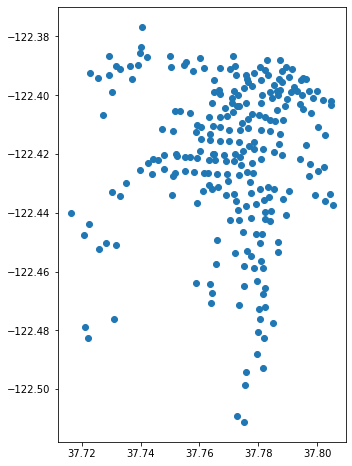

In [12]:
gdf_dt.plot(figsize=(8,8))

In [13]:
dt_join2 = gpd.sjoin(gdf_dt,dem, op='within')
dt_join2.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: CRS mismatch between the CRS of left geometries and the CRS of right geometries.
Use `to_crs()` to reproject one of the input geometries to match the CRS of the other.

Left CRS: None
Right CRS: EPSG:4326

  """Entry point for launching an IPython kernel.


ImportError: ignored

In [ ]:
dt_join2= dt_join2[dt_join2['station_id'].notnull()]
dt_join2.to_csv('SFdem.csv', index=False)

In [14]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [15]:
class AnalysisConfig:
    def __init__(self, shapefile_path='', stations_path=''):
        self.shapefile_path = shapefile_path
        self.stations_path = stations_path

In [16]:
STATIONS_DIR = '/content/drive/MyDrive/data/exports'
SHAPEFILE_DIR = '/content/drive/MyDrive/dem2'

config_sf = AnalysisConfig(
    shapefile_path = '{}/SFdem.shp'.format(SHAPEFILE_DIR),
    stations_path = '{}/stations_san_francisco.csv'.format(STATIONS_DIR),
)

config_dc = AnalysisConfig(
    shapefile_path = '{}/washington_dc.shp'.format(SHAPEFILE_DIR),
    stations_path = '{}/stations_washington_dc.csv'.format(STATIONS_DIR),
)

In [17]:
CRS_PLOT = 'EPSG:4326'

def plot_stations(zips_gdf, stations_gdf):
    fig, ax = plt.subplots(figsize=(10, 10))
    zips_gdf.to_crs({'init': CRS_PLOT}).plot(ax=ax)
    stations_gdf.to_crs({'init': CRS_PLOT}).plot(ax=ax, color='orange')
    plt.show()

In [18]:
def load_gdfs(config):
    zips_gdf = gpd.read_file(config.shapefile_path)
    stations_df = pd.read_csv(config.stations_path)
    stations_gdf = gpd.GeoDataFrame(stations_df, geometry=gpd.points_from_xy(stations_df['lng'], stations_df['lat'])).set_crs('EPSG:4326')
    return (zips_gdf, stations_gdf)

In [28]:
demSF= load_gdfs(config_sf)
demSF

(         DN                                           geometry
 0         1  POLYGON ((-122.37285 37.83322, -122.37276 37.8...
 1         1  POLYGON ((-122.37294 37.83313, -122.37285 37.8...
 2         1  POLYGON ((-122.37303 37.83304, -122.37294 37.8...
 3         2  POLYGON ((-122.37312 37.83295, -122.37303 37.8...
 4         1  POLYGON ((-122.37321 37.83286, -122.37312 37.8...
 ...     ...                                                ...
 218066  112  POLYGON ((-122.46142 37.70826, -122.46124 37.7...
 218067  111  POLYGON ((-122.46124 37.70826, -122.46115 37.7...
 218068  110  POLYGON ((-122.46115 37.70826, -122.46106 37.7...
 218069    0  POLYGON ((-122.45917 37.70826, -122.45567 37.7...
 218070    0  POLYGON ((-122.35713 37.72838, -122.35704 37.7...
 
 [218071 rows x 2 columns],
     station_id        lat         lng                     geometry
 0     SF I29-1  37.783375 -122.393276  POINT (-122.39328 37.78338)
 1       SF-A19  37.805339 -122.437250  POINT (-122.43725 37.80534

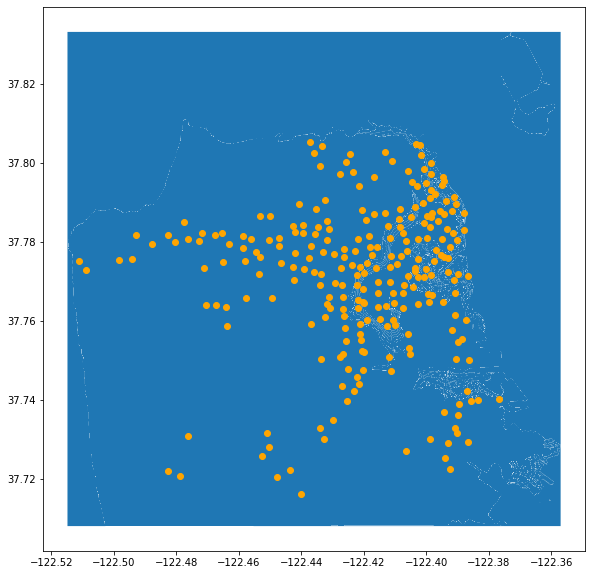

In [19]:
plot_stations(*load_gdfs(config_sf))